# **Hepatitis C (HCV) Exploratory Data Analysis**

In [8]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size': 21})
warnings.filterwarnings('ignore')

# **Features distributions and categories**

First we check the data types of the columns in the dataset and if it contains missing values:

In [9]:
df = pd.read_csv("Hepatitis_C.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     204 non-null    int64  
 1   Sex     204 non-null    int64  
 2   ALB     204 non-null    float64
 3   ALP     204 non-null    float64
 4   ALT     204 non-null    float64
 5   AST     204 non-null    float64
 6   BIL     204 non-null    float64
 7   CHE     204 non-null    float64
 8   CHOL    204 non-null    float64
 9   CREA    204 non-null    float64
 10  GGT     204 non-null    float64
 11  PROT    204 non-null    float64
 12  label   204 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 20.8 KB


As we can see columns:
- 0,1,12 are discrete
- 2 - 11 are continuous

Additionally, we can see that we have 204 entries and there are no missing values in the dataset.

Lets get some additional information about the dataset:

In [10]:
df.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,label
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,47.779412,0.357843,41.200490,66.647549,29.841618,48.688725,16.460294,7.934951,5.212157,86.037255,55.117157,72.811765,0.333333
std,10.615323,0.480545,5.656545,33.630161,30.205844,50.826309,29.763884,2.569216,1.128499,83.340139,78.465442,5.581961,0.472564
min,19.000000,0.000000,20.000000,11.300000,0.900000,12.200000,1.800000,1.420000,1.430000,8.000000,7.000000,51.000000,0.000000
25%,40.000000,0.000000,38.950000,52.000000,14.900000,22.425000,5.800000,6.637500,4.445000,66.625000,18.600000,70.000000,0.000000
50%,48.000000,0.000000,41.900000,62.700000,21.500000,29.800000,8.800000,7.970000,5.220000,75.600000,28.700000,72.750000,0.000000
75%,56.000000,1.000000,45.000000,76.250000,35.025000,47.500000,14.025000,9.652500,5.957500,86.250000,64.200000,76.100000,1.000000
max,76.000000,1.000000,62.900000,416.600000,258.000000,324.000000,254.000000,16.410000,8.280000,1079.100000,650.900000,90.000000,1.000000


Now its evident that columns:
- 1,12 are binary
- 0 is discrete
- and 2-11 are continuous
  
Thus we have a binary classification problem with 204 entries and 12 features.

In [11]:
df_features = df.iloc[:, 0:-1]
df_targets = df.iloc[:, -1]

## *TSNE visualization*

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.5696448683738708


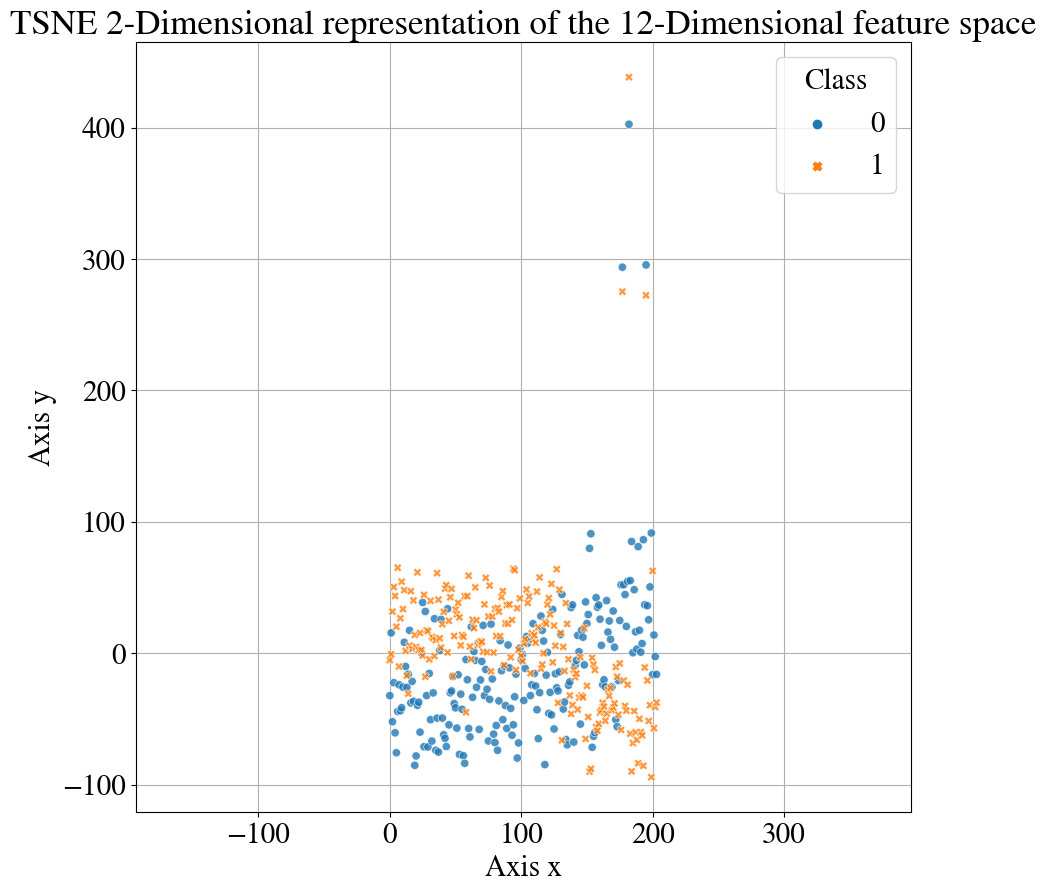

In [12]:
from sklearn.manifold import TSNE


def plot_tsne(X, title, save=False, save_name="tsne"):
    tsne = TSNE(n_components=2, learning_rate='auto',
                init='pca', perplexity=30, method='barnes_hut')
    X_tsne = tsne.fit_transform(X)
    print(
        f"Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data {tsne.kl_divergence_}")
    plt.figure(figsize=(10, 10))
    sns.scatterplot(X_tsne, alpha=0.8)
    plt.axis("equal")
    plt.ylabel("Axis y")
    plt.xlabel("Axis x")
    plt.legend(title="Class")
    plt.title(title)
    plt.grid()
    if save:
        plt.savefig(fname=f'images/{save_name}.png', dpi=300,
                    format='png',  bbox_inches='tight')
    plt.show()


plot_tsne(df_features, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 12-Dimensional feature space")

Many medical datasets have imbalanced classes, so we check the distribution of the classes:

In [13]:
print(dict(zip(np.bincount(df_targets), ["Healthy Donor samples",
      "HCV positive samples"])))

{136: 'Healthy Donor samples', 68: 'HCV positive samples'}


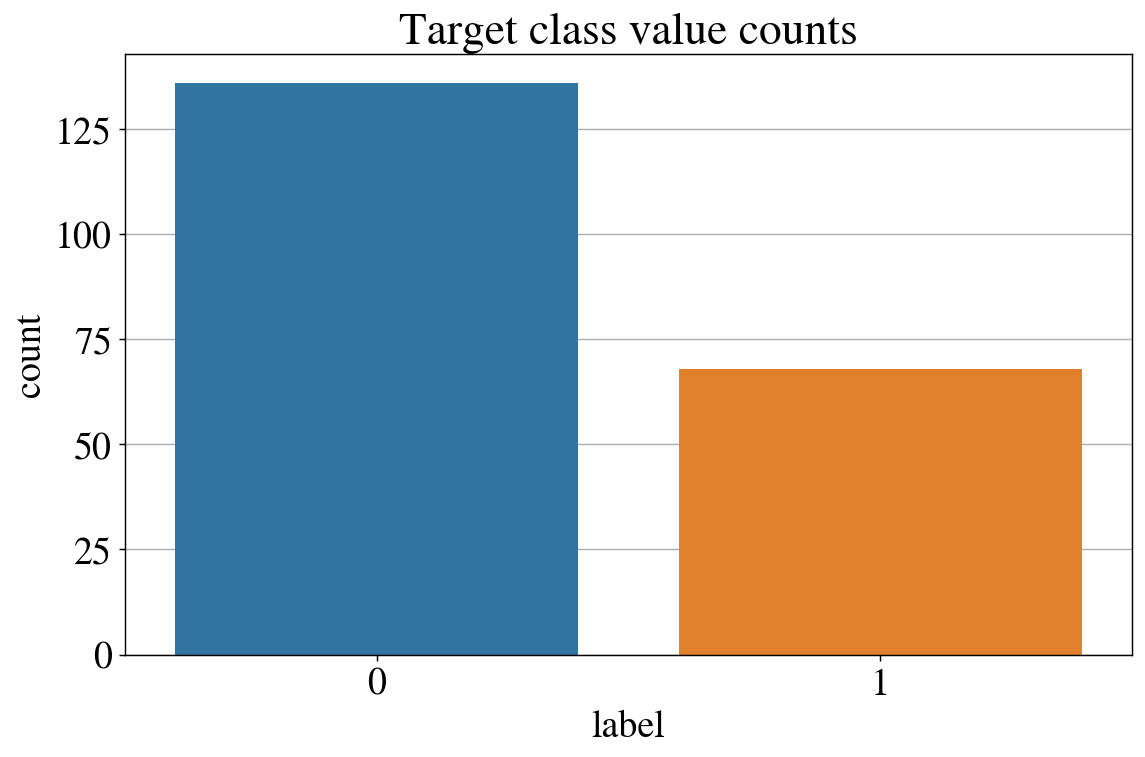

In [14]:
plt.figure(figsize=(10, 6), dpi=130)
plt.grid()
sns.countplot(x=df_targets)
plt.title("Target class value counts")
plt.show()

As its showcased in the plot above the HCV positive class is underrepresented in the dataset. This is common with medical datasets and we should take it into account when chosing an evaluation metric.

We now investigate the distribution of discrete and continuous features, we of course exclude the binary features and the target variable.

In [15]:
df_disc_cont = df_features.drop(columns=['Sex'])
df_disc_cont_header = df_disc_cont.columns
df_disc_cont.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,47.779412,41.200490,66.647549,29.841618,48.688725,16.460294,7.934951,5.212157,86.037255,55.117157,72.811765
std,10.615323,5.656545,33.630161,30.205844,50.826309,29.763884,2.569216,1.128499,83.340139,78.465442,5.581961
min,19.000000,20.000000,11.300000,0.900000,12.200000,1.800000,1.420000,1.430000,8.000000,7.000000,51.000000
25%,40.000000,38.950000,52.000000,14.900000,22.425000,5.800000,6.637500,4.445000,66.625000,18.600000,70.000000
50%,48.000000,41.900000,62.700000,21.500000,29.800000,8.800000,7.970000,5.220000,75.600000,28.700000,72.750000
75%,56.000000,45.000000,76.250000,35.025000,47.500000,14.025000,9.652500,5.957500,86.250000,64.200000,76.100000
max,76.000000,62.900000,416.600000,258.000000,324.000000,254.000000,16.410000,8.280000,1079.100000,650.900000,90.000000


# **Preprocessing**

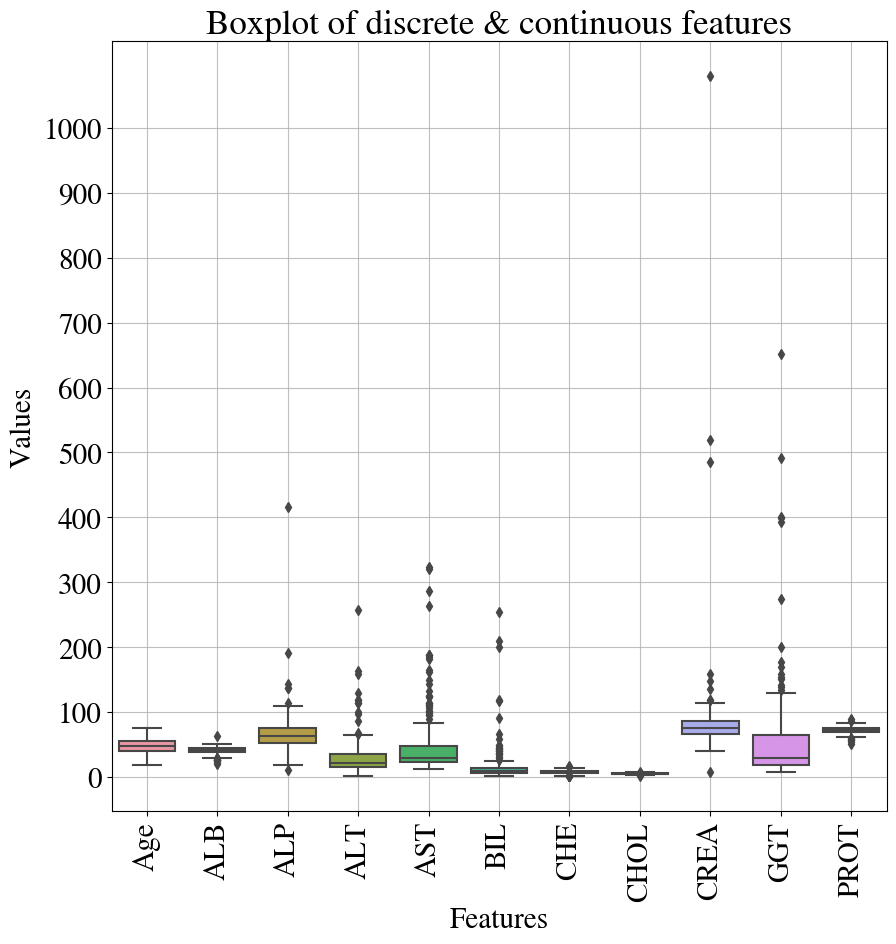

In [16]:
plt.figure(figsize=(10, 10))
plt.title("Boxplot of discrete & continuous features")
sns.boxplot(df_disc_cont)
plt.xlabel("Features")
plt.ylabel("Values")
plt.yticks(np.arange(0, 1100, 100))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
# plt.savefig(fname='images/df_boxplot.png', dpi=300, format='png',  bbox_inches='tight')
plt.show()

Its clear that the the range of values for the features is different, so we should scale the data before training the model. Thus preprocessing is needs to be utilized

## *Normalization*

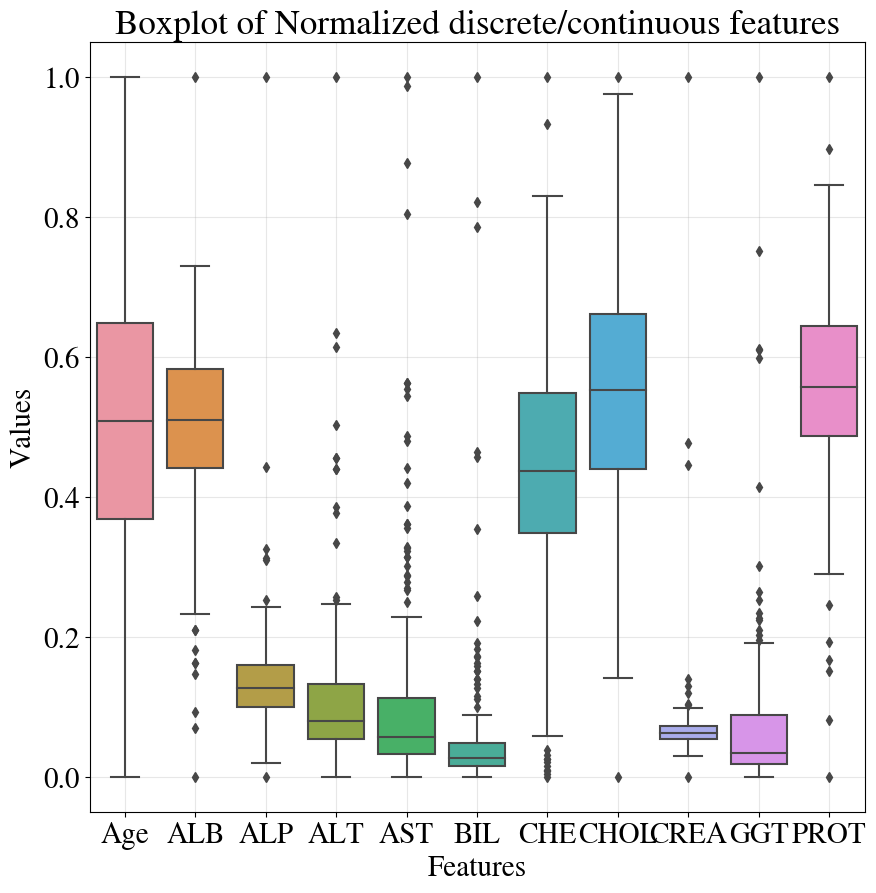

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(df_features.values)
features = pd.DataFrame(features, columns=df_features.columns)

plt.figure(figsize=(10, 10))
sns.boxplot(features.drop(columns='Sex'))

plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(alpha=0.3)
plt.title("Boxplot of Normalized discrete/continuous features")
# plt.savefig(fname='images/minmax_boxplot.png', dpi=300,
#             format='png',  bbox_inches='tight')
plt.show()

Normalization gives the `Sex` feature a much greater importance since it creates edge cases. If we use Normalization we need to be sure that this 

In [18]:
data = df[['Sex', 'label']]
data_f = data[data['Sex'] == 1]
data_m = data[data['Sex'] == 0]

HCV_f_ratio = (np.sum(data_f['label'] == 1)/data_f.shape[0])*100
HCV_m_ratio = (np.sum(data_m['label'] == 1)/data_m.shape[0])*100
print(
    f"HVC positive case are present in {round(HCV_f_ratio,3)}% of the dataset female population")
print(
    f"HVC positive case are present in {round(HCV_m_ratio,3)}% of the dataset female population")

HVC positive case are present in 27.397% of the dataset female population
HVC positive case are present in 36.641% of the dataset female population


## *Standardization*

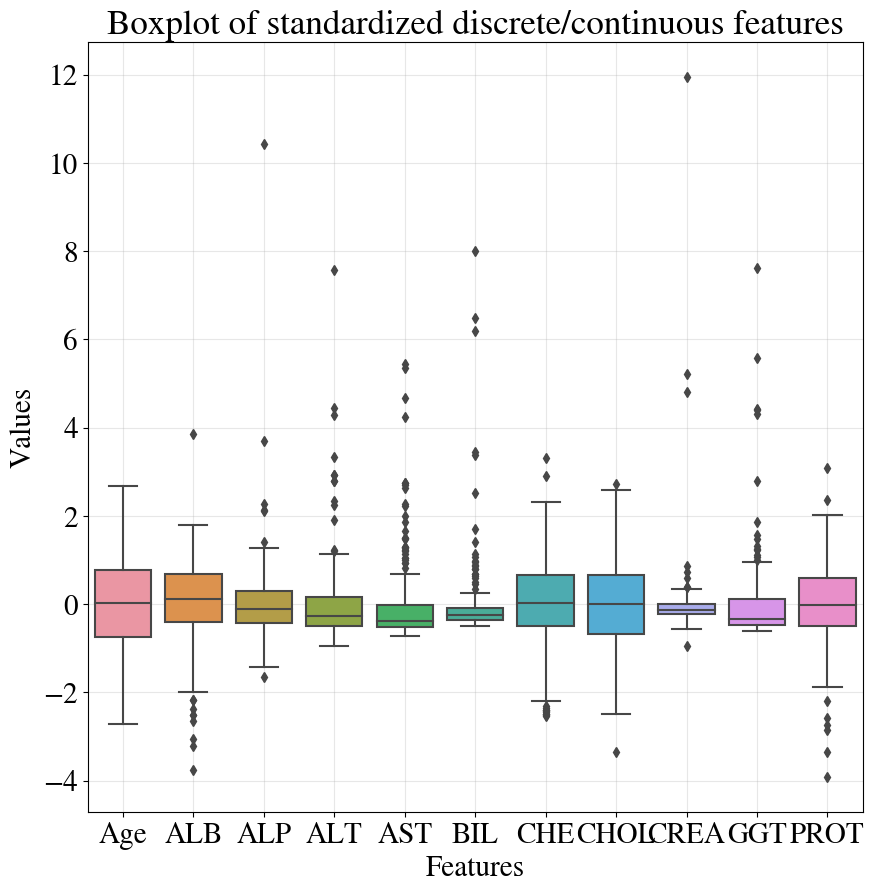

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_disc_cont = scaler.fit_transform(df_disc_cont.values)
df_disc_cont = pd.DataFrame(df_disc_cont, columns=df_disc_cont_header)

plt.figure(figsize=(10, 10))
sns.boxplot(df_disc_cont)
plt.title("Boxplot of standardized discrete/continuous features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(alpha=0.3)
plt.show()

## *Investigating Outlier removal*

In [20]:
def remove_outliers(df):
    Q1 = np.percentile(df, 25, axis=0)
    Q3 = np.percentile(df, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df >= lower_bound) & (df <= upper_bound)]
    df.dropna(inplace=True)
    return df


df_no_outlier = remove_outliers(df)

In [21]:
class_balance_with_outliers = df_no_outlier['label'].value_counts()
class_balance_no_outliers = df['label'].value_counts()
class_balance = pd.concat(
    [class_balance_with_outliers, class_balance_no_outliers], axis=1)
class_balance.columns = ["With outliers removed", "With outliers present"]

class_balance.T

,0,1
With outliers removed,119,21
With outliers present,136,68


In [22]:
print(f"If outliers are removed the majority class loses its {1 - (119/136)}%")
print(f"If outliers are removed the minority class loses its {1-(21/68)}%")

If outliers are removed the majority class loses its 0.125%
If outliers are removed the minority class loses its 0.6911764705882353%


It clear that outlier removal results in a much lower HCV positive class ratio of $15\%$ (21 out of 141 samples), thus outlier hold valuable information for the HCV positive class and should not be dismissed. This makes perfect sense in terms of medical laboratory data where we expect a divergence from a normal range in a result to be a sign of pathology.

# **Dimensionality Reduction**

PCA provides a good way to reduce dimensionality when linear relationships in the data exists.  We plot the first three principal components of the data.

As its presented below only 55.33% of the variance is explained by the first three principal components. We conclude that the features on not  strongly linearly dependent.

Total variance explained by the first 3 PCs: 76.27%


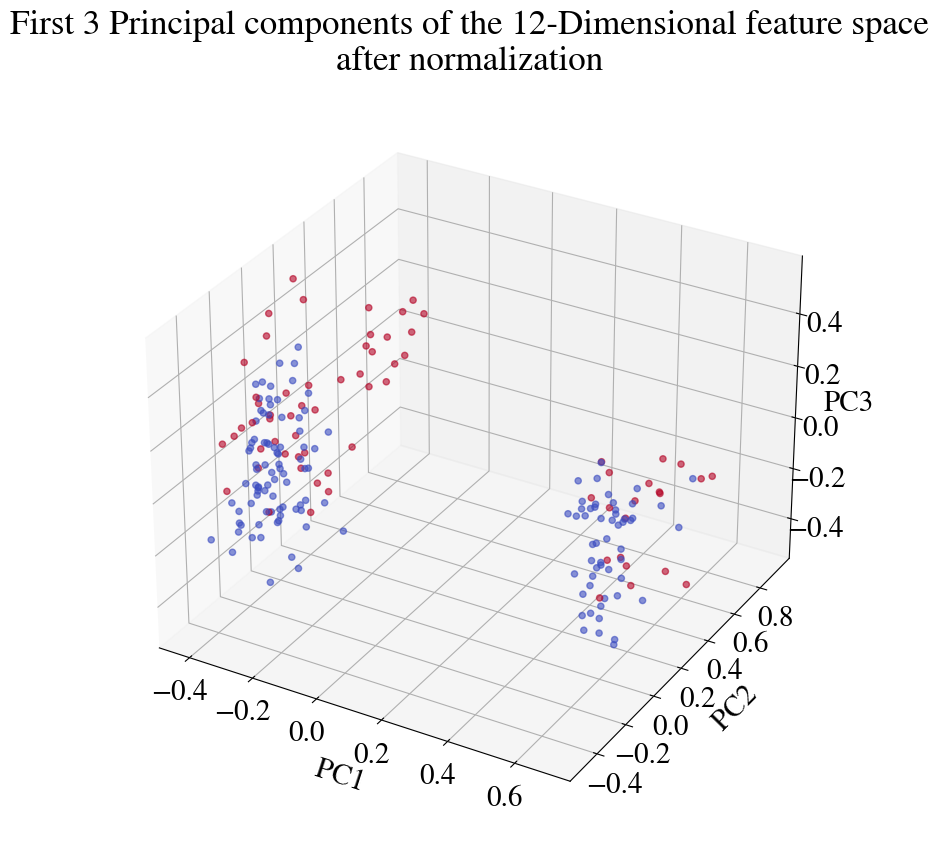

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(features.values)
variance_explained = pca.explained_variance_ratio_
print(
    f"Total variance explained by the first 3 PCs: {round(np.sum(variance_explained)*100,2)}%")
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
           c=df_targets, cmap="coolwarm", alpha=0.6)
ax.set_box_aspect(aspect=None, zoom=0.95)
ax.set_title(
    "First 3 Principal components of the 12-Dimensional feature space\nafter normalization")
ax.set_xlabel("\n  PC1")
ax.set_ylabel("\n  PC2")
ax.set_zlabel("PC3")
plt.grid()
plt.savefig(fname='images/pca.png', dpi=300,
            format='png',  bbox_inches='tight')
plt.show()

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.3332347273826599


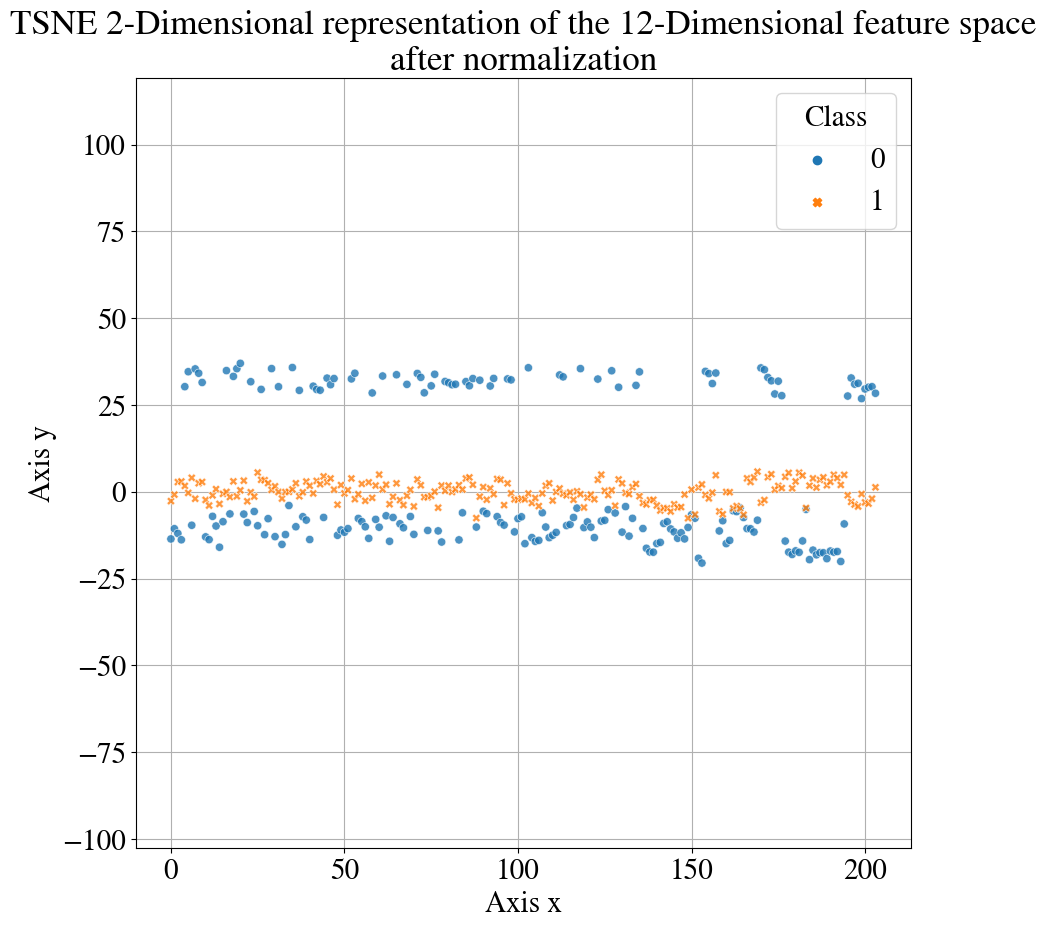

In [24]:
from sklearn.manifold import TSNE


plot_tsne(features.values, save=False, save_name='minmax_tsne',
          title="TSNE 2-Dimensional representation of the 12-Dimensional feature space\nafter normalization")

# **Investigating Feature Importance**

## *Linear Methods*

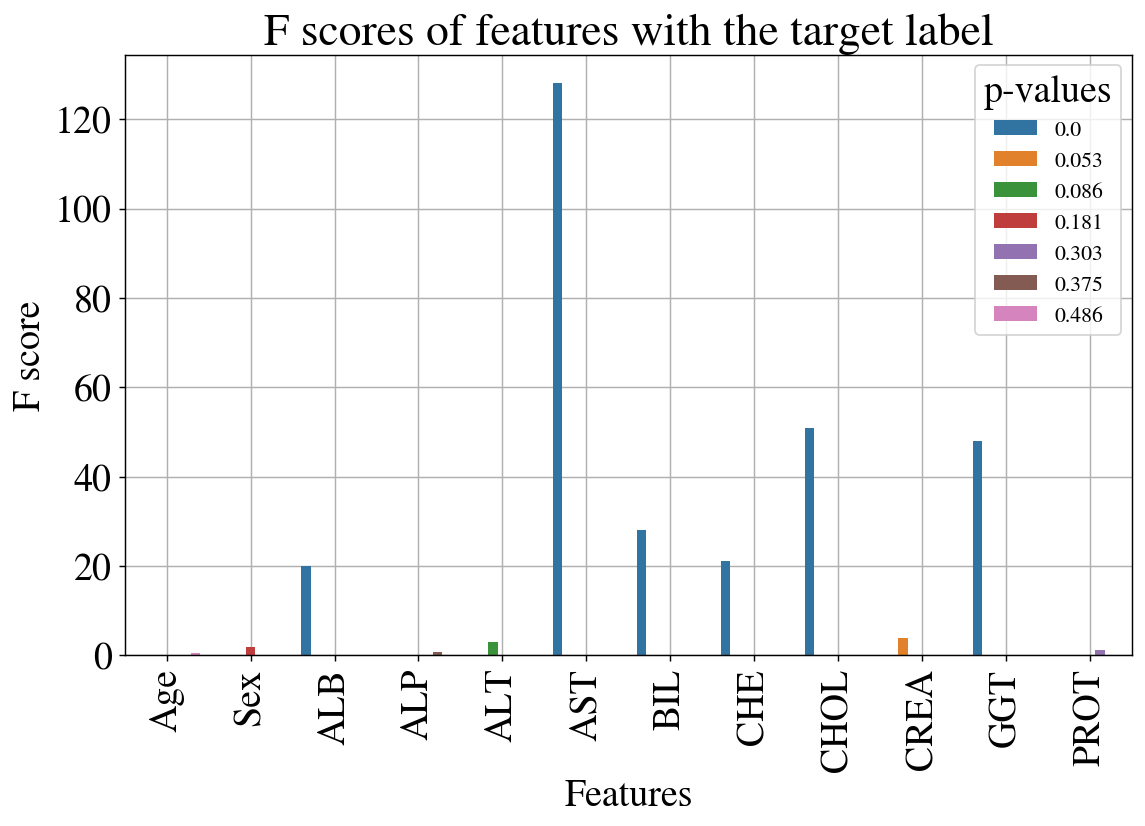

In [27]:
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(df_features.values, df['label'])
plt.figure(figsize=(10, 10), dpi=30)
sns.barplot(x=features.columns, y=f_scores, hue=[
            round(value, 3) for value in p_values], )
plt.title("F scores of features with the target label")
plt.legend(title="p-values", fontsize=12)
plt.ylabel("F score")
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.grid()
plt.show()

## *Non Linear Methods*

Correlation is only one way to investigate feature importance, a more robust way to uncover the information gain for each feature is Mutual Information

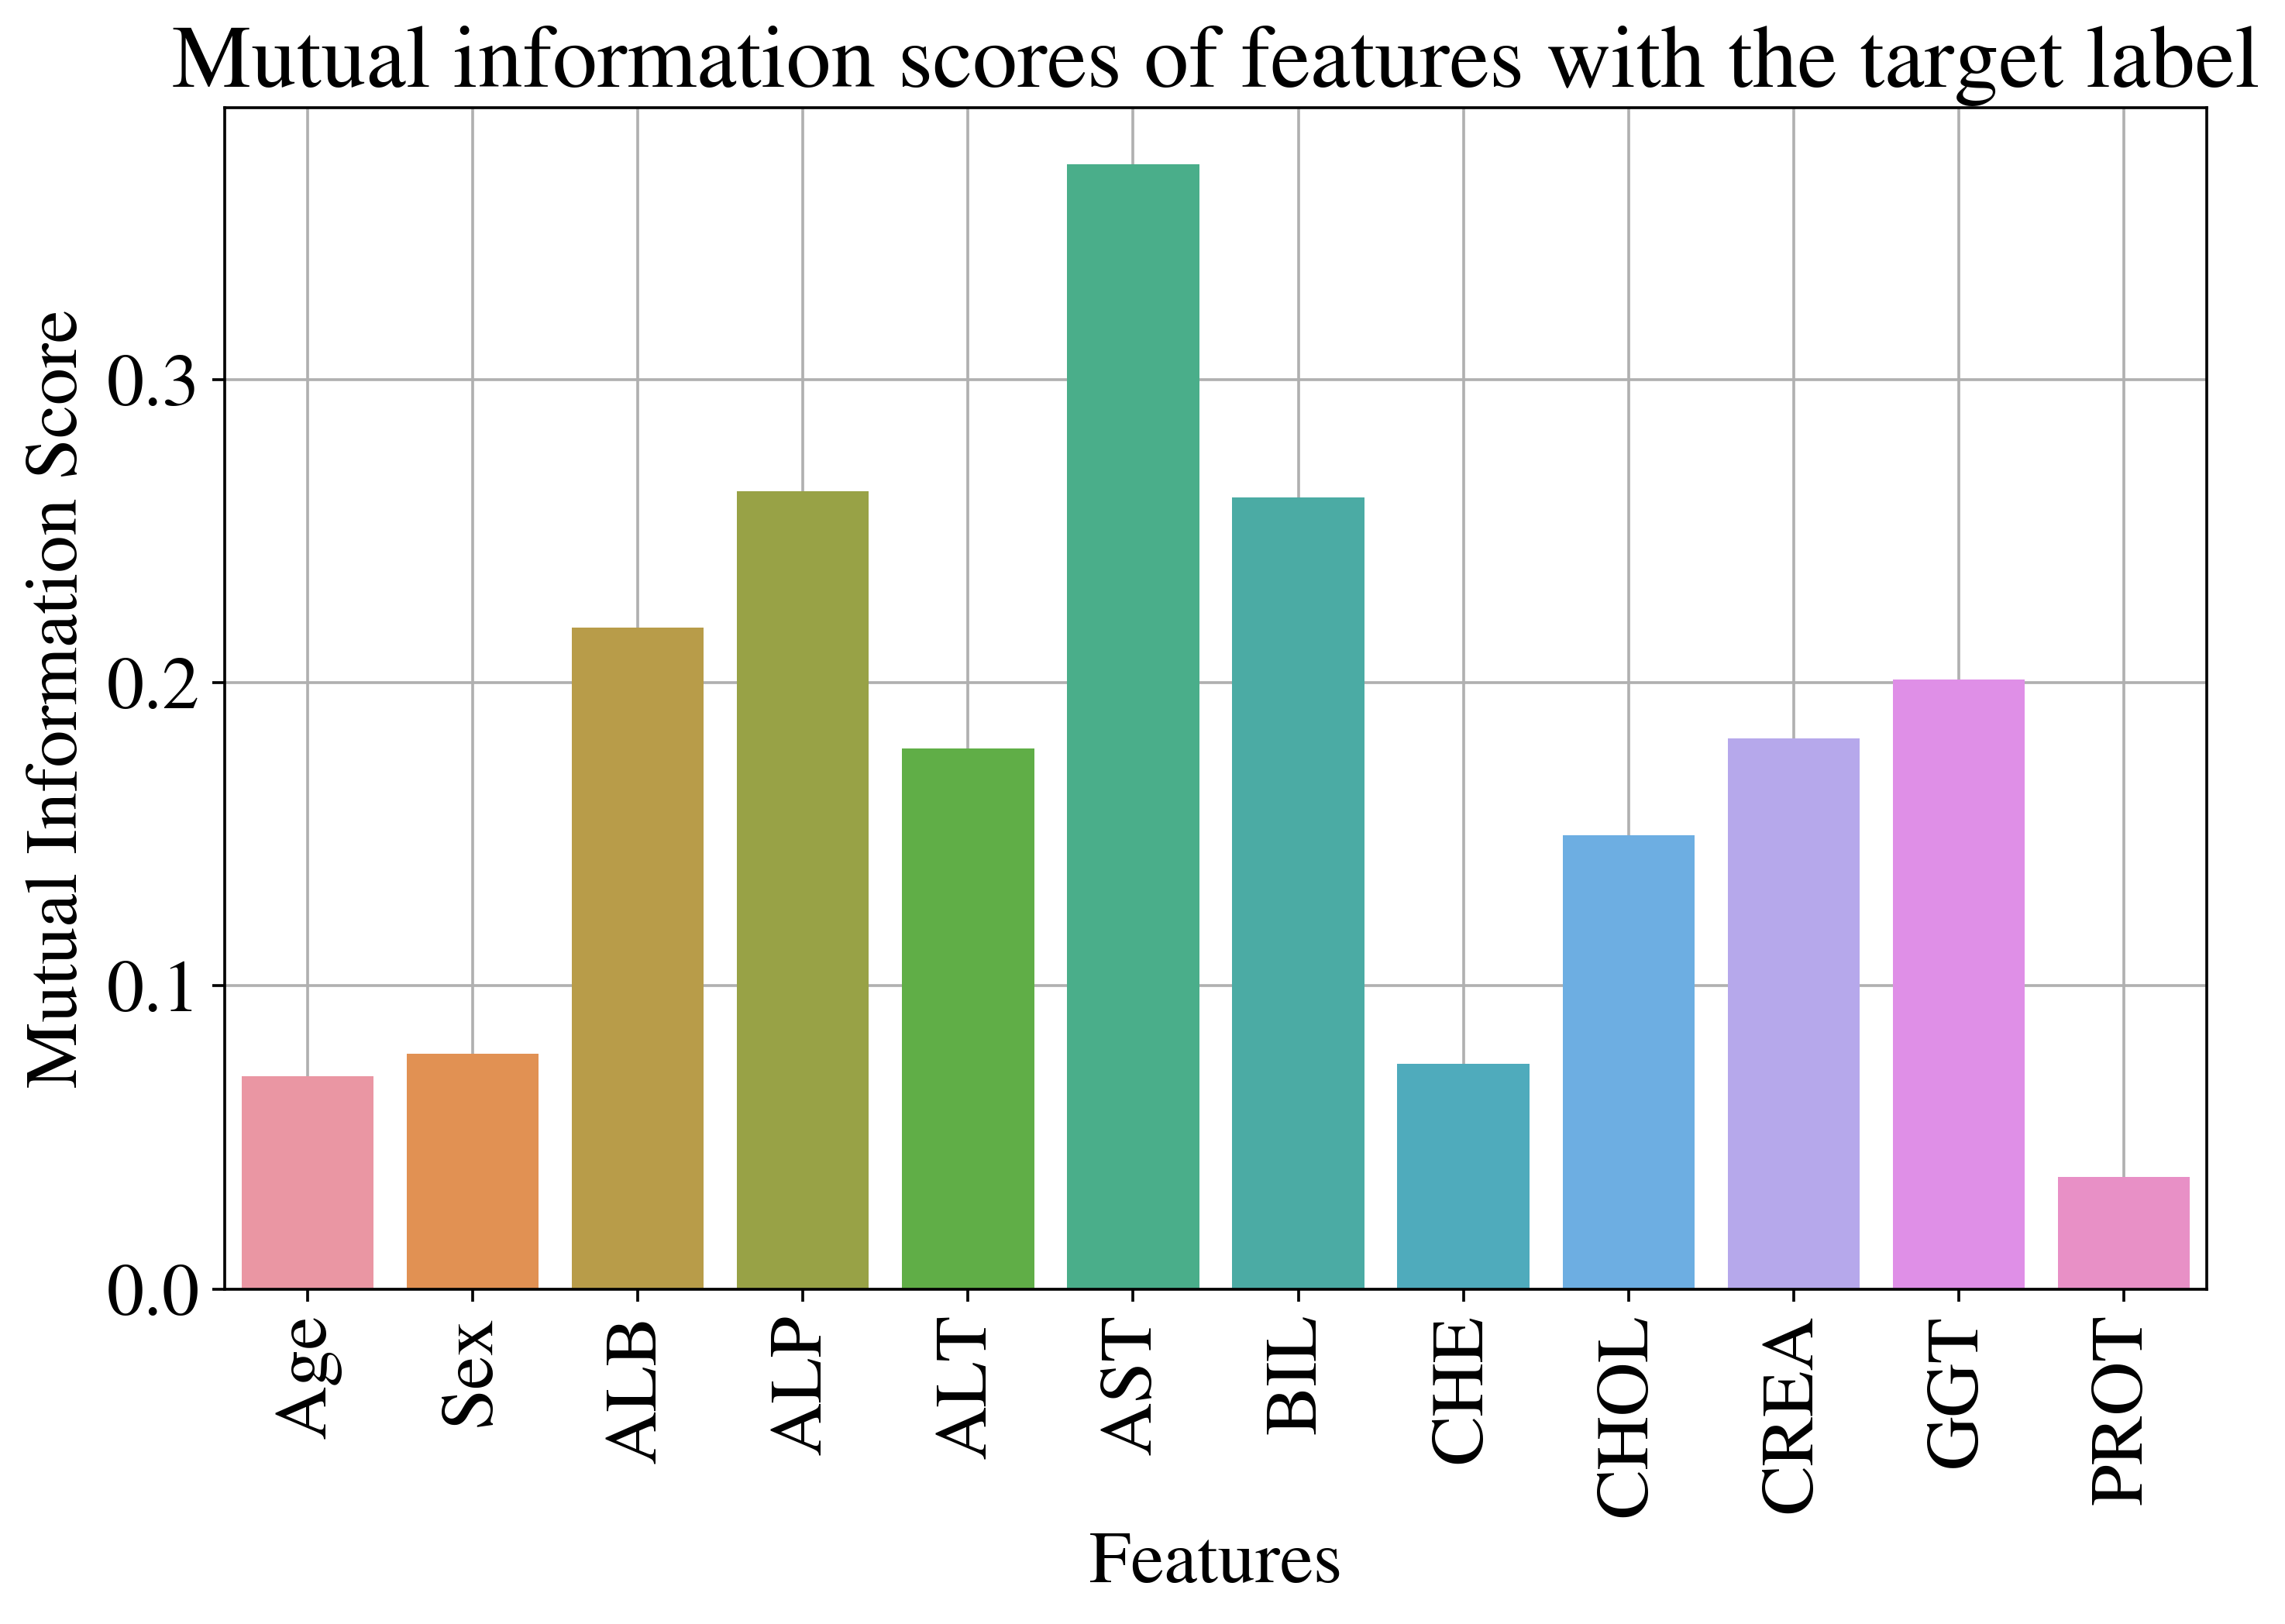

In [26]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(df_features.values, df['label'], n_neighbors=3)
plt.figure(figsize=(10, 6), dpi=330)
sns.barplot(x=features.columns, y=mi_scores)
plt.title("Mutual information scores of features with the target label")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.grid()
plt.show()